In [1]:
import os

import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [77]:
list_photos = []

In [78]:
for file_name in os.listdir('exp1'):
    list_photos.append(cv2.imread(os.path.join('exp1', file_name),  cv2.IMREAD_COLOR))

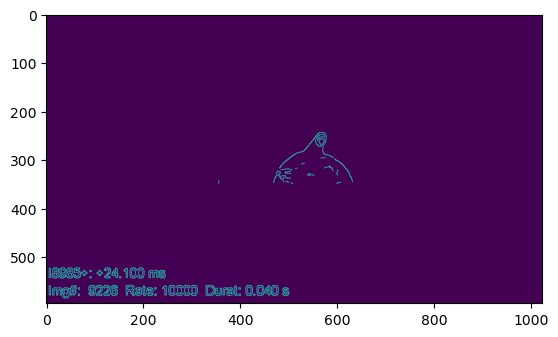

In [79]:
# Load the image
img = list_photos[80]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blurring to remove noise
blur = cv2.GaussianBlur(gray, (7,7), 0)

# Apply Canny edge detection
edges = cv2.Canny(blur, 200, 230)

# Display the results
plt.imshow(edges)

In [83]:
def shaded_contours(zeroes, min_area=0, max_area = 10000):
    # Convert the input image to 8-bit grayscale
    gray = cv2.cvtColor(np.uint8(zeroes), cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blurring to remove noise
    blur = cv2.GaussianBlur(gray, (7,7), 0)

    # Apply Canny edge detection with the current parameters
    edges = cv2.Canny(blur, 100, 200)

    # Perform closing operation to close the contour
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Dilate the contours
    kernel = np.ones((5,5), np.uint8)
    dilated = cv2.dilate(closed, kernel, iterations=3)

    # Find the contours in the binary image
    contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a new black image with the same shape as the input
    shaded = np.zeros(zeroes.shape)

    # Loop through each contour and draw it filled in white on the shaded image
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area and area < max_area:
            cv2.drawContours(shaded, [contour], 0, (255, 255, 255), -1)

    # Add the shaded image to the original image with alpha blending

    return shaded


In [90]:
# Apply Gaussian blurring to remove noise
blur = cv2.GaussianBlur(gray, (7,7), 0)

# Apply Canny edge detection with the current parameters
edges = cv2.Canny(blur, 100, 200)

# Perform closing operation to close the contour
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Dilate the contours
kernel = np.ones((5,5), np.uint8)
dilated = cv2.dilate(closed, kernel, iterations=3)

# Find the contours in the binary image
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the original image
contour_img = img.copy()
zeroes = np.zeros(contour_img.shape)
cv2.drawContours(zeroes, contours, -1, (0, 255, 0), 2)


# Display the results with the current parameters
plt.imshow(zeroes)
plt.show()


error: OpenCV(4.7.0) /io/opencv/modules/core/src/arithm.cpp:647: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


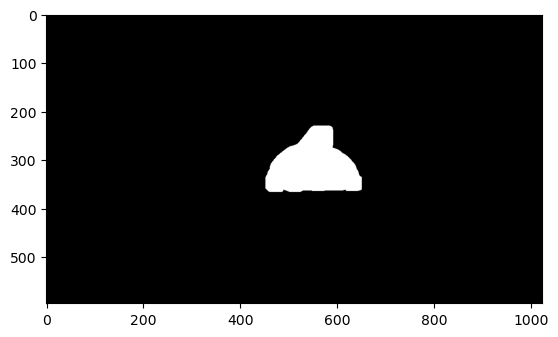

In [85]:

new_img = shaded_contours(zeroes, 10000, 20000)
plt.imshow(new_img)
plt.show()

In [ ]:
c_0 = contours[0]# image moment
M = cv2.moments(c_0)
print(M.keys())

# test all images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


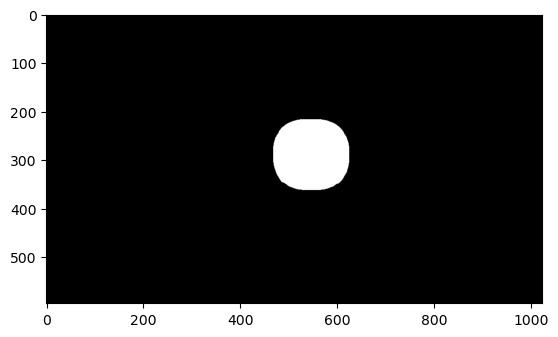

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


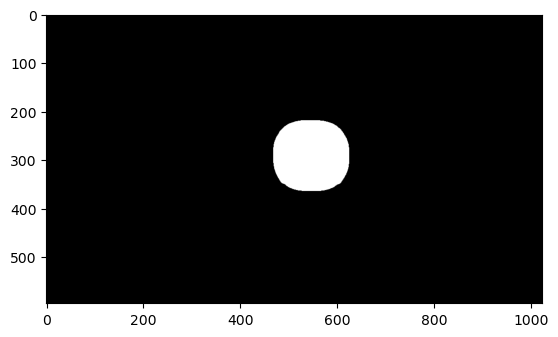

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


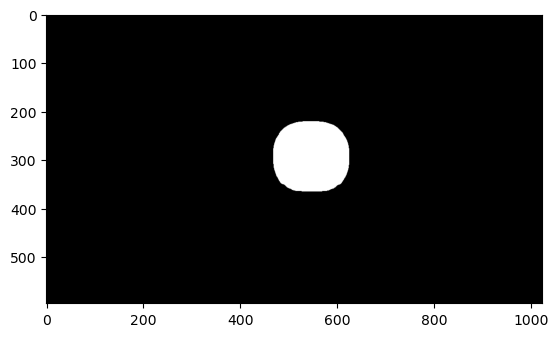

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


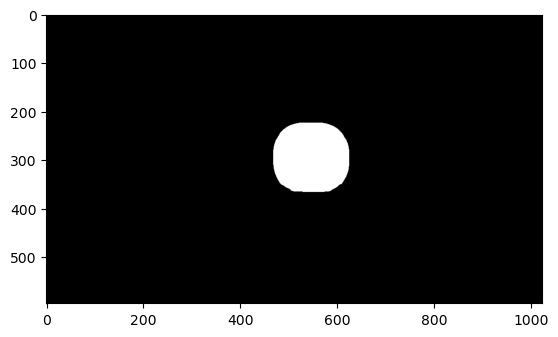

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


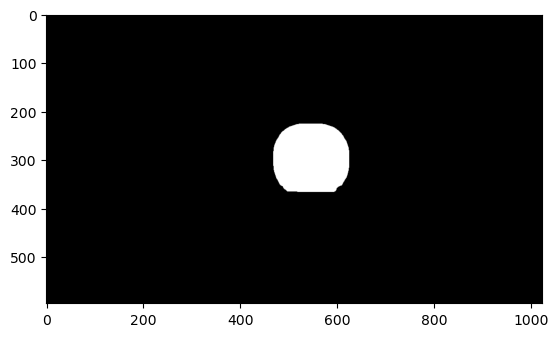

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


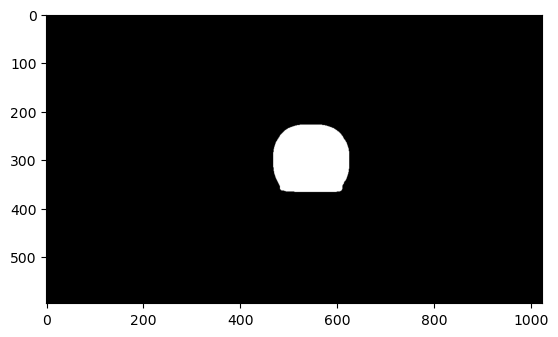

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


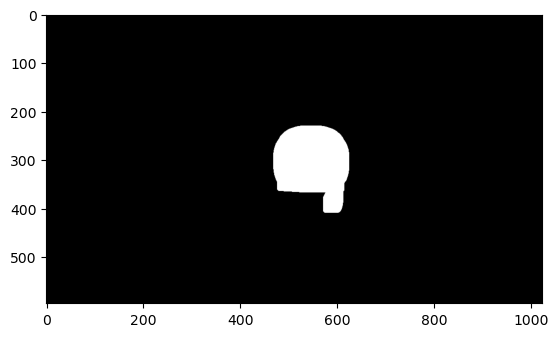

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


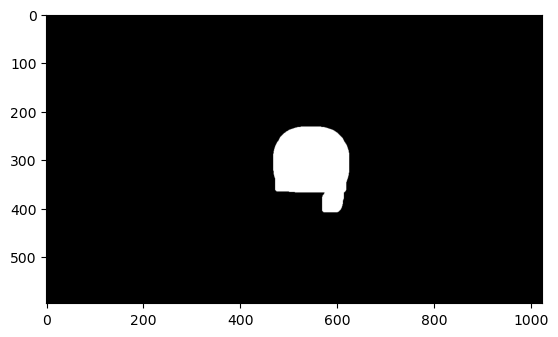

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


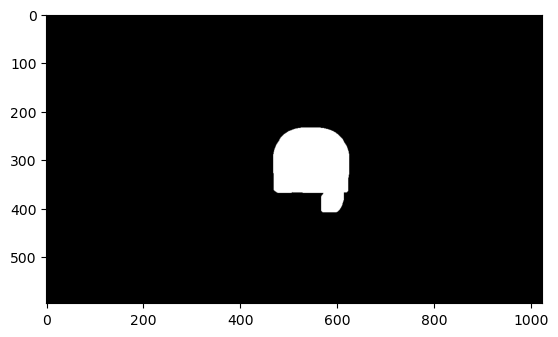

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


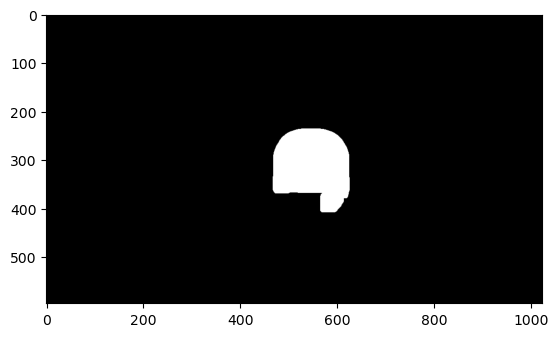

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


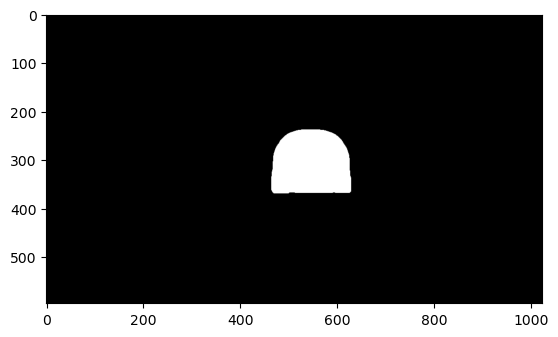

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


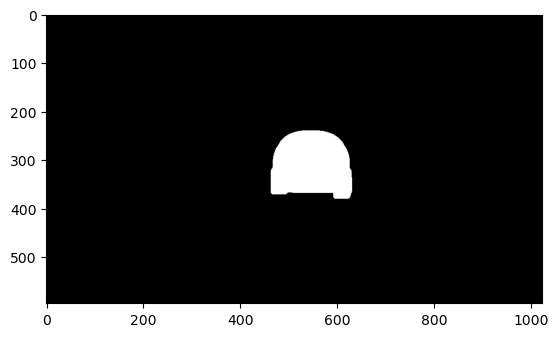

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


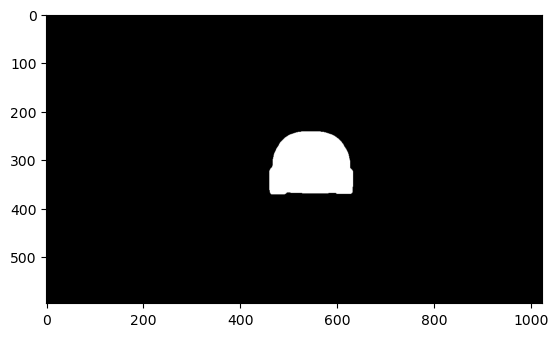

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


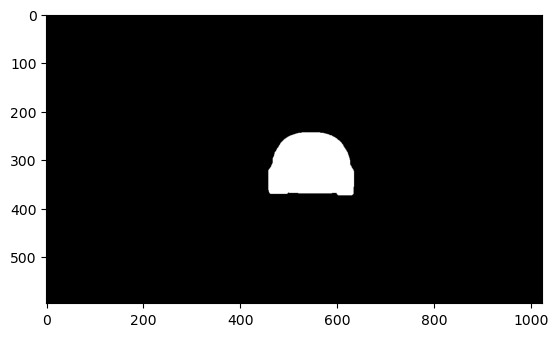

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


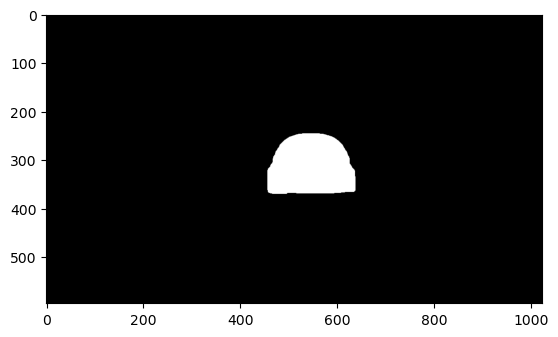

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


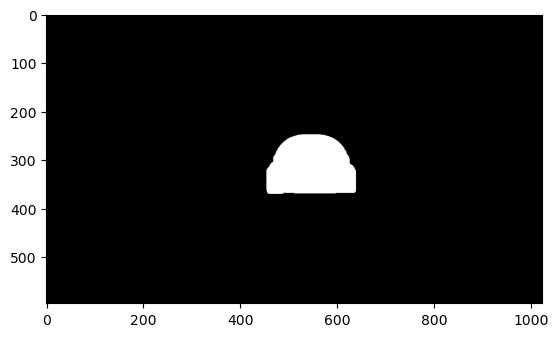

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


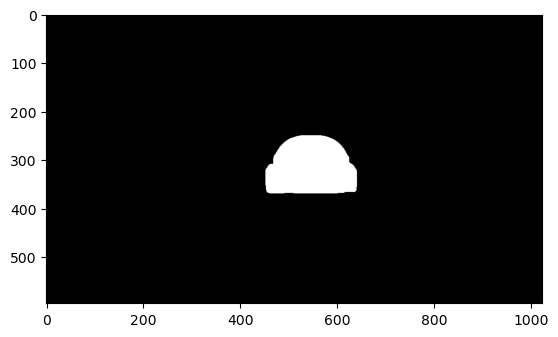

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


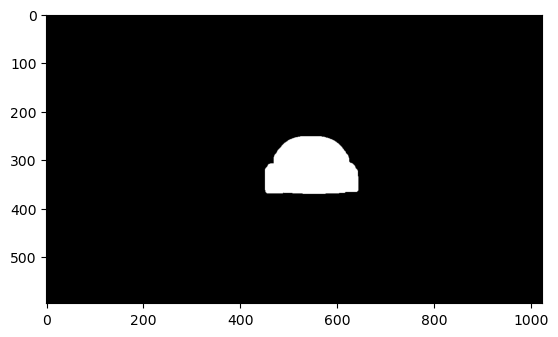

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


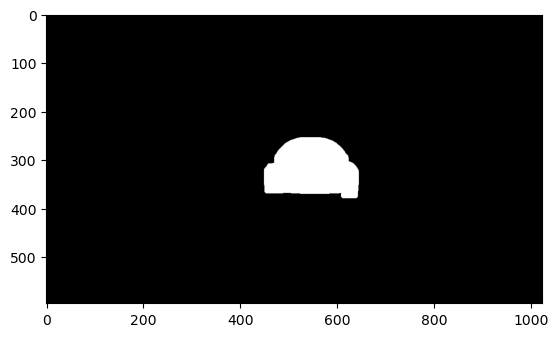

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


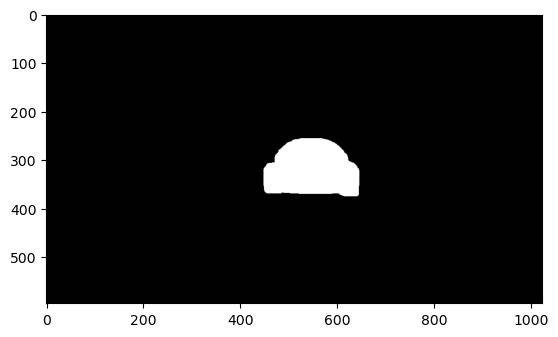

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


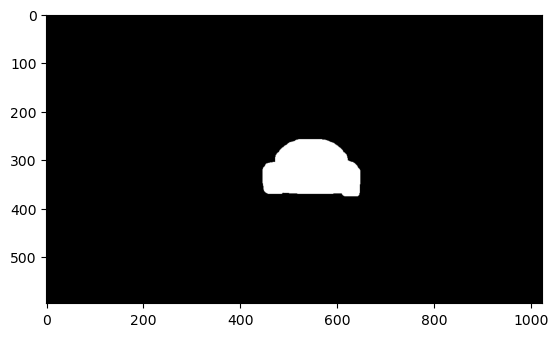

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


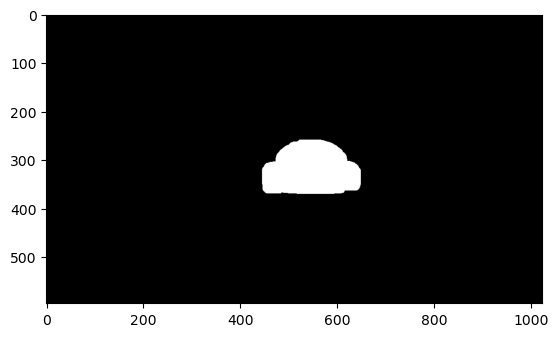

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


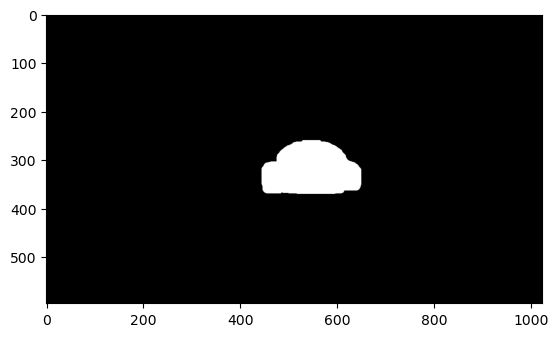

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


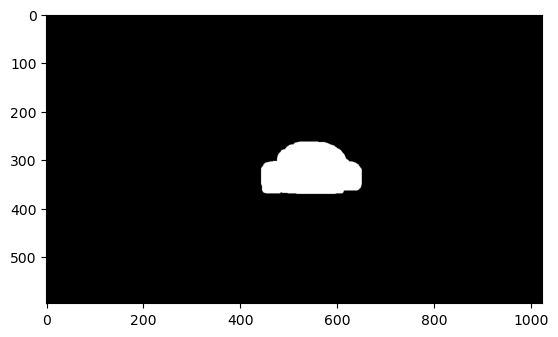

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


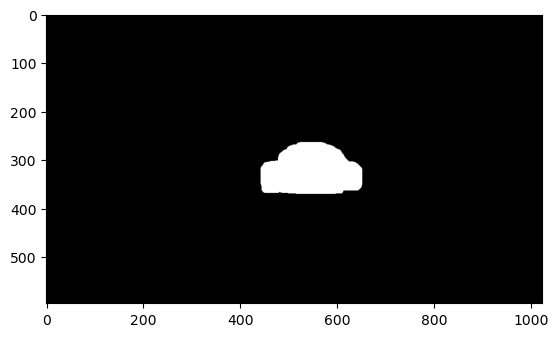

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


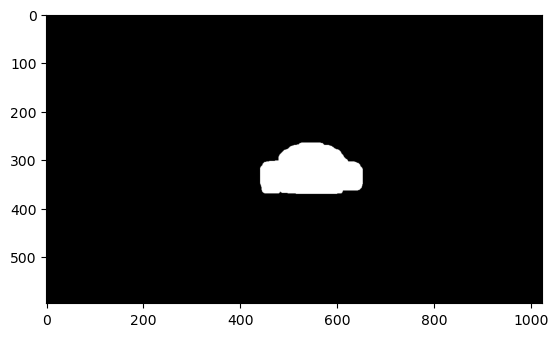

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


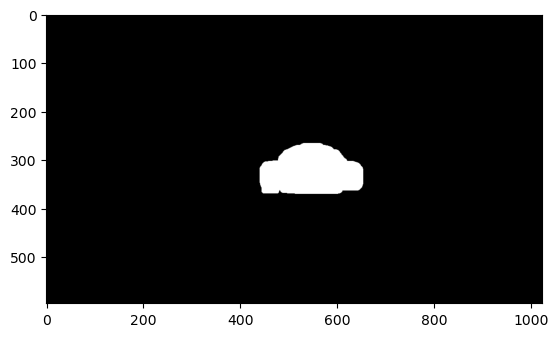

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


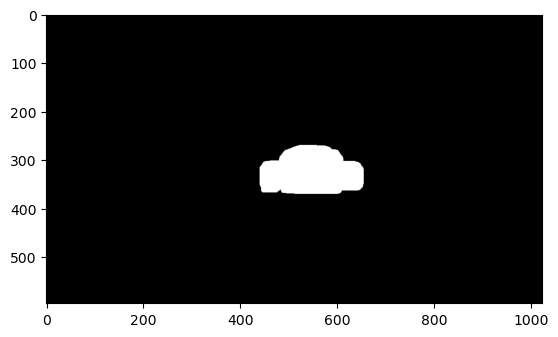

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


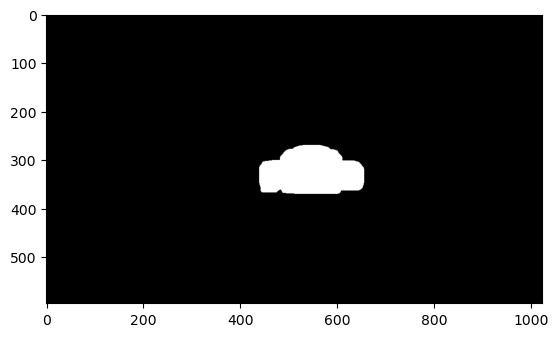

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


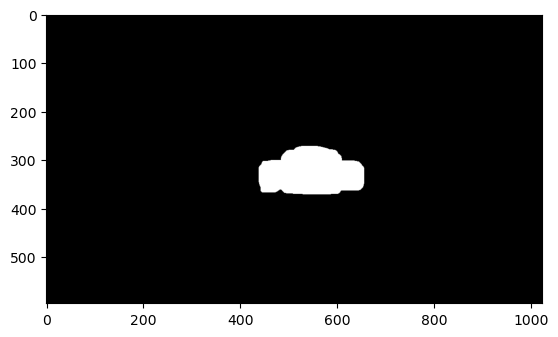

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


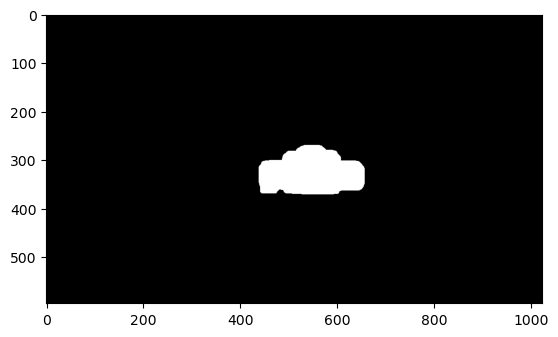

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


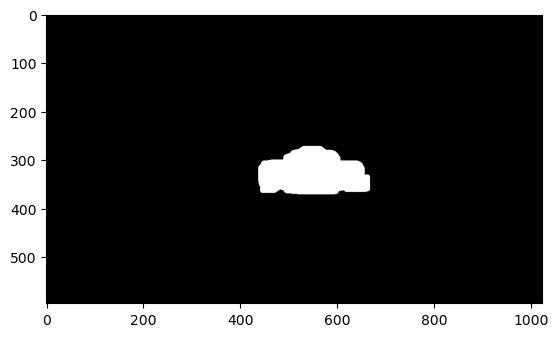

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


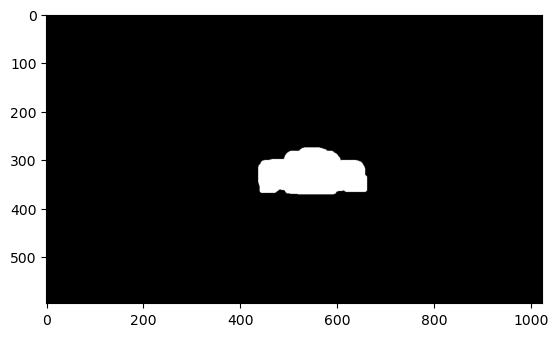

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


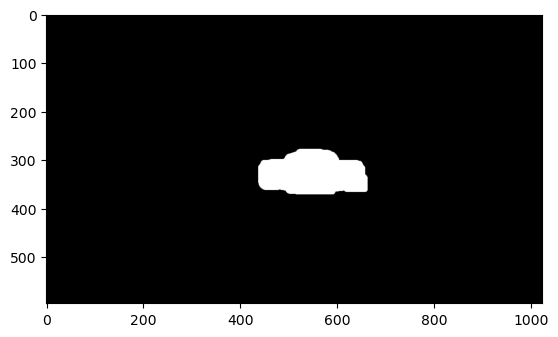

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


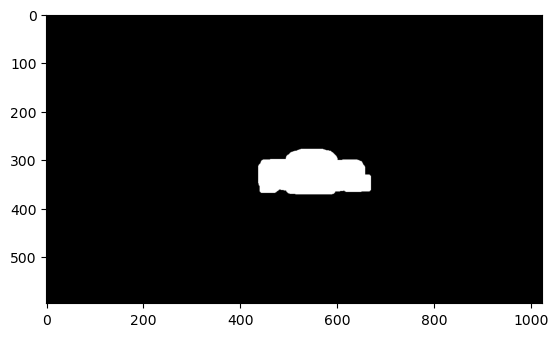

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


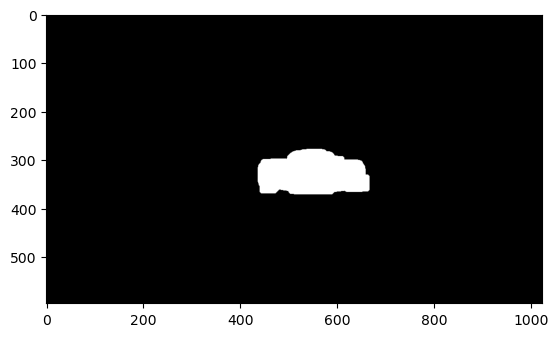

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


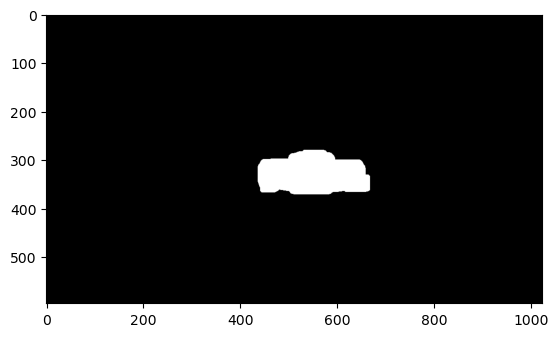

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


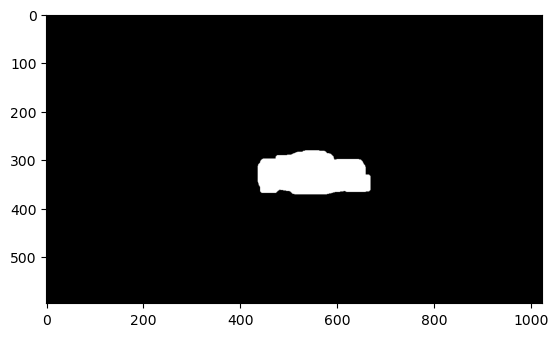

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


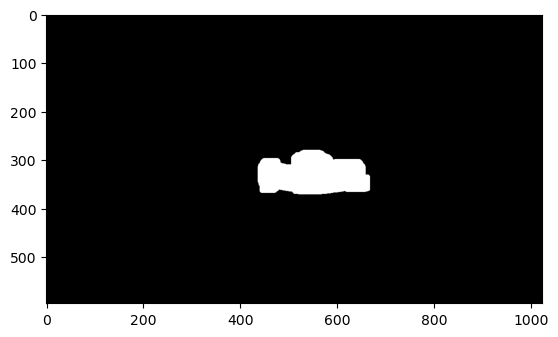

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


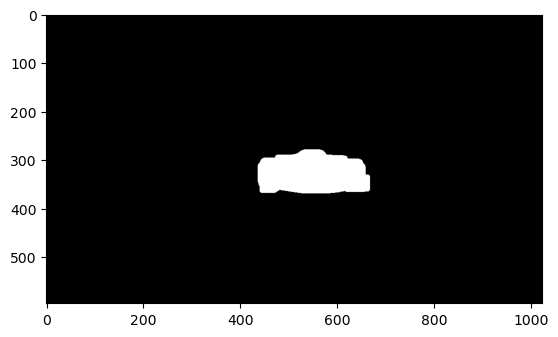

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


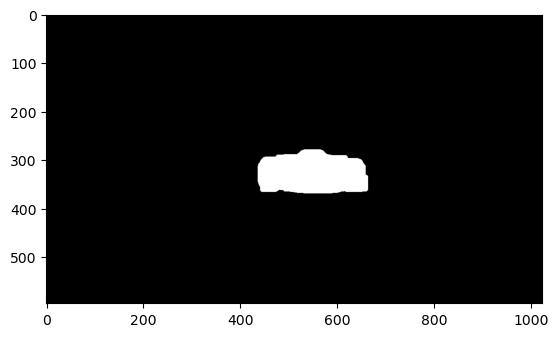

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


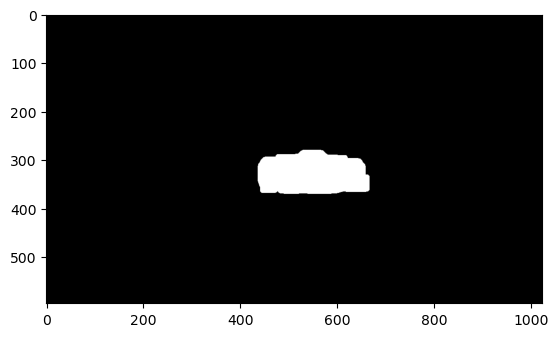

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


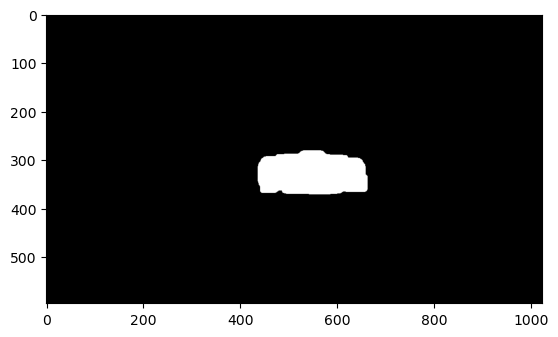

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


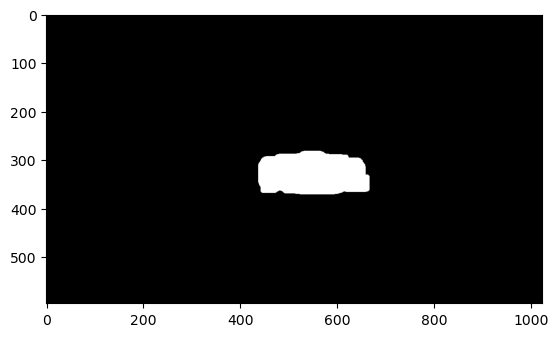

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


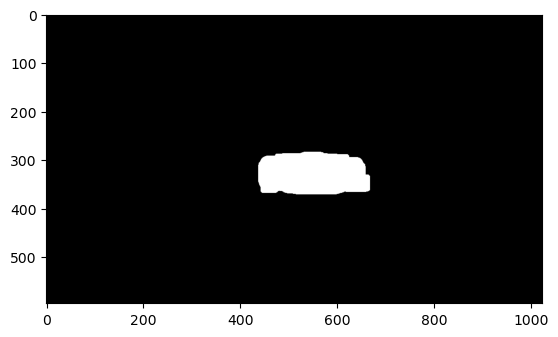

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


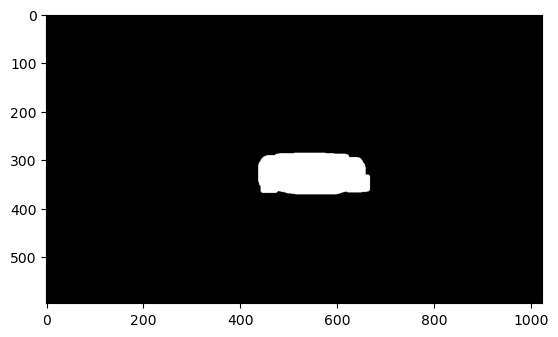

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


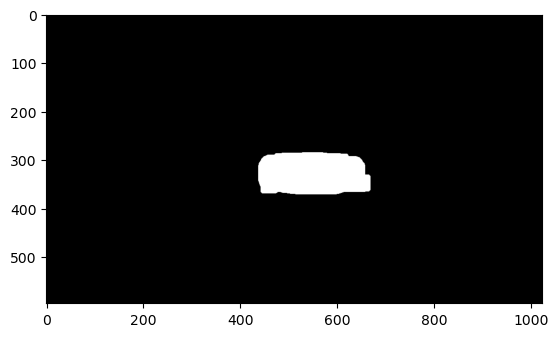

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


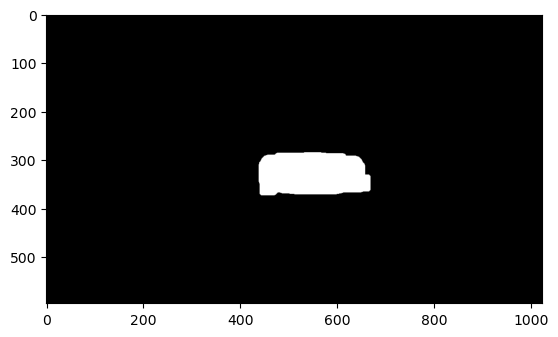

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


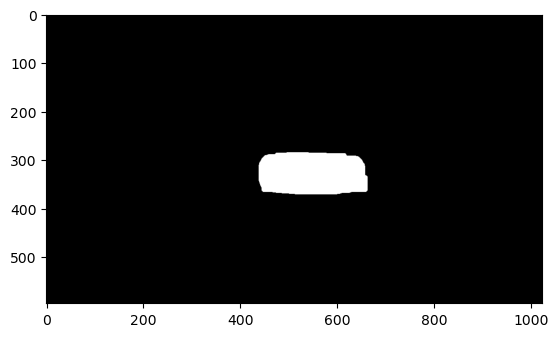

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


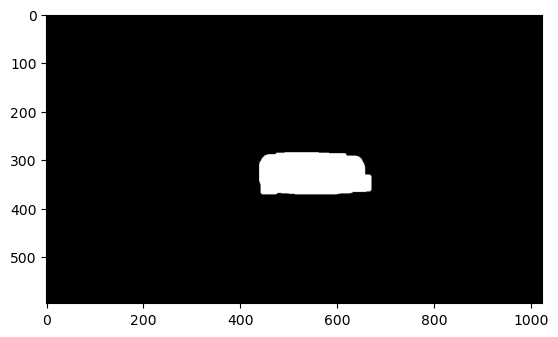

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


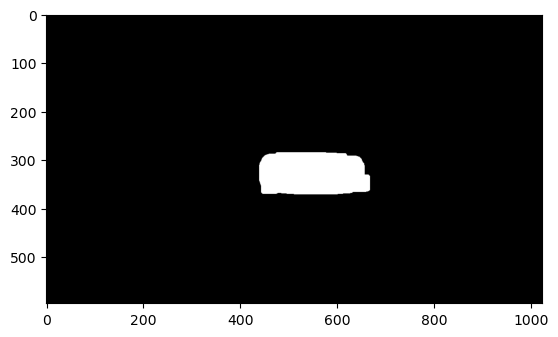

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


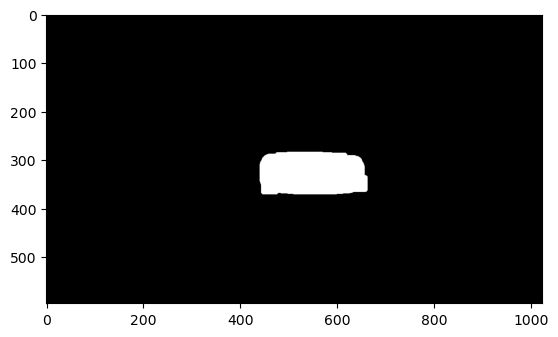

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


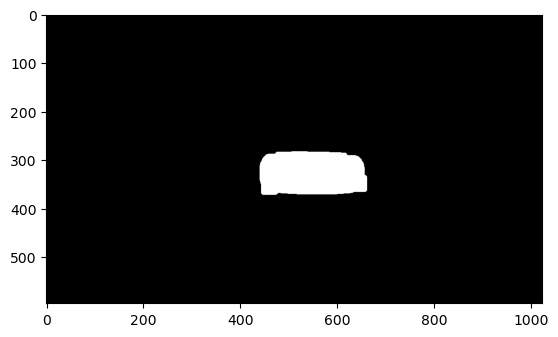

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


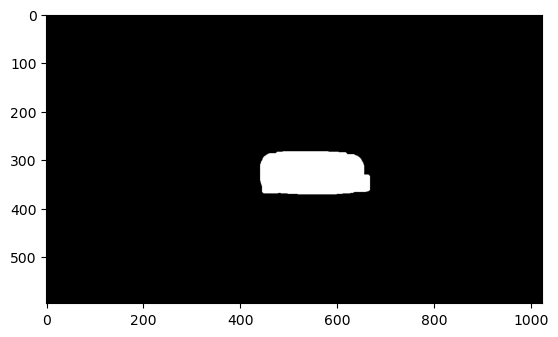

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


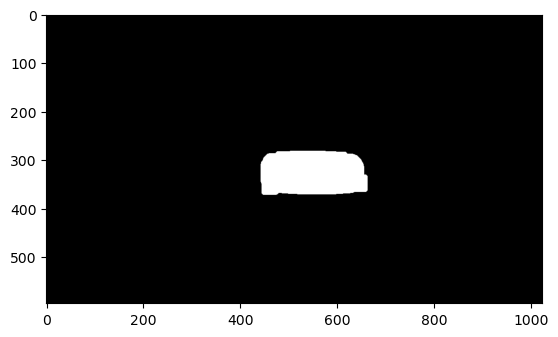

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


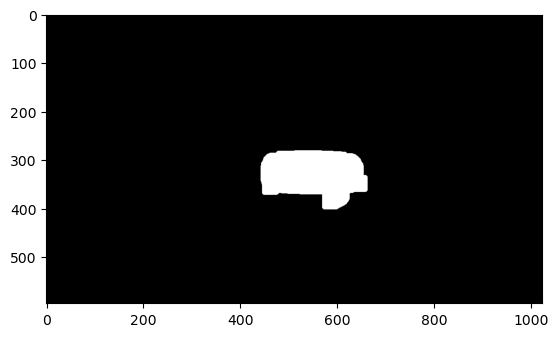

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


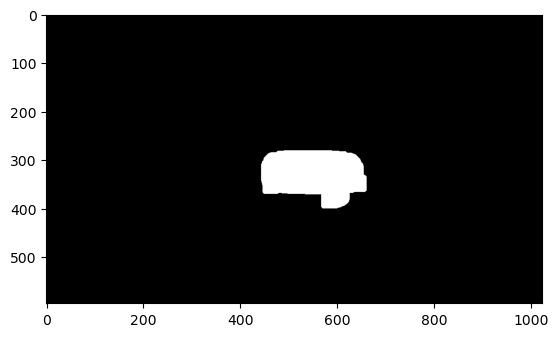

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


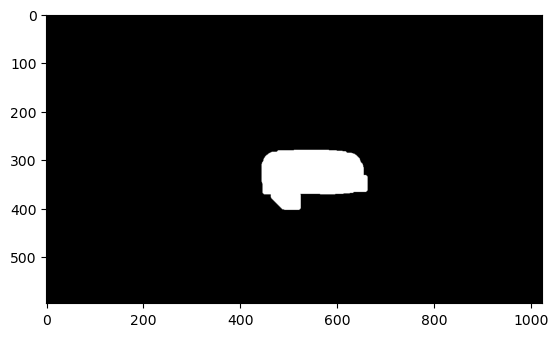

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


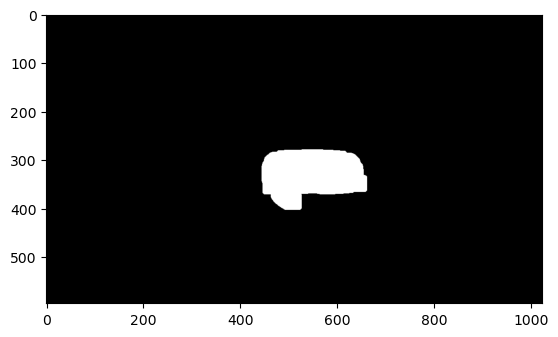

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


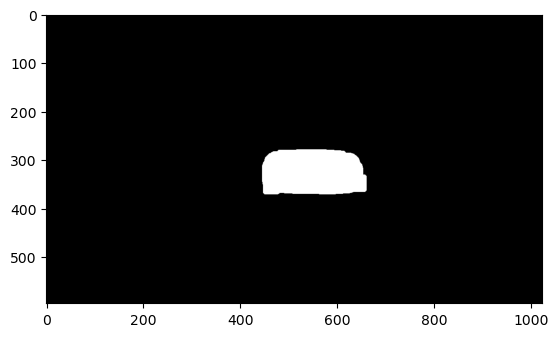

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


KeyboardInterrupt: 

In [113]:
for i in list_photos:
    # Load the image
    img = i

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blurring to remove noise
    blur = cv2.GaussianBlur(gray, (7,7), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blur, 200, 230)

    # Apply Gaussian blurring to remove noise
    blur = cv2.GaussianBlur(gray, (7,7), 0)

    # Apply Canny edge detection with the current parameters
    edges = cv2.Canny(blur, 100, 200)

    # Perform closing operation to close the contour
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Dilate the contours
    kernel = np.ones((5,5), np.uint8)
    dilated = cv2.dilate(closed, kernel, iterations=3)

    # Find the contours in the binary image
    contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours on a copy of the original image
    contour_img = img.copy()
    zeroes = np.zeros(contour_img.shape)
    cv2.drawContours(zeroes, contours, -1, (0, 255, 0), 2)



    new_img = shaded_contours(zeroes, 10000, 20000)
    new_img = cv2.GaussianBlur(new_img, (7,7), 0)

    plt.imshow(new_img)
    plt.show()